In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
path=os.getcwd() +'/data/ex1data2.txt'
data=pd.read_csv(path,header=None,names=['Size', 'Bedrooms', 'Price'])
data2=data
data.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
data=(data)/data.std()
data.head()

,Size,Bedrooms,Price
0,2.647532,3.942275,3.198179
1,2.013332,3.942275,2.638358
2,3.019999,3.942275,2.951058
3,1.781799,2.628183,1.855408
4,3.774998,5.256367,4.317822


In [25]:

data.insert(0,'ones',1)

In [26]:
x=data2.Size
y=data2.Price
data.head()


,ones,Size,Bedrooms,Price
0,1,2.647532,3.942275,3.198179
1,1,2.013332,3.942275,2.638358
2,1,3.019999,3.942275,2.951058
3,1,1.781799,2.628183,1.855408
4,1,3.774998,5.256367,4.317822


In [27]:
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
Y=data.iloc[:,cols-1:cols]
X=np.matrix(X.values)
Y=np.matrix(Y.values)

In [28]:
theta=np.matrix(np.zeros(X.shape[1],dtype=int))
X[:,1].shape ,Y.shape

((47, 1), (47, 1))

In [29]:
def computeCost(X,Y,theta):
    inner=np.power((( X * theta.T )- Y ),2)
    suminner=np.sum(inner)
    return suminner/(2*len(X))

In [30]:
computeCost(X,Y,theta)

4.1951804759270344

In [31]:
def gradecent(X,Y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=X*theta.T-Y
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-(alpha/len(X))*np.sum(term)
            
        theta=temp
        cost[i]=computeCost(X,Y,theta)
    return theta , cost

In [32]:
alpha=0.05
iters=1000
t,c=gradecent(X,Y,theta,alpha,iters)
t

matrix([[ 0.66220484,  0.88502688, -0.0409523 ]])

In [33]:
computeCost(X,Y,t)

0.13076521845489752

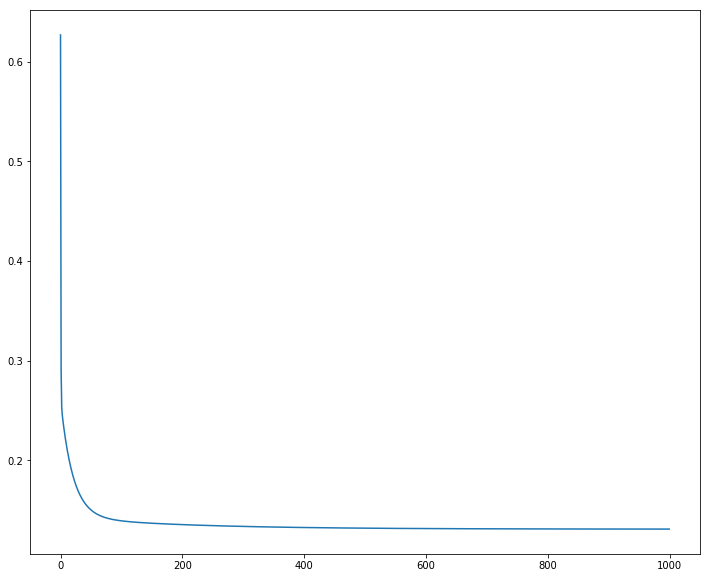

In [34]:
fig,ax=plt.subplots(figsize=(12,10))

ax.plot(np.arange(iters),c)

In [35]:
py=t[0,0]*X[:,0]+t[0,1]*X[:,1]+t[0,2]*X[:,2]

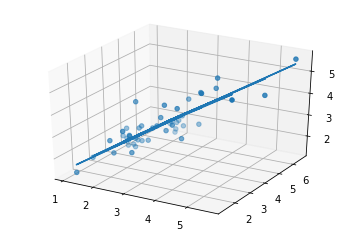

In [36]:
from mpl_toolkits.mplot3d import Axes3D
x2=np.linspace(data.Bedrooms.min(),data.Bedrooms.max(),47)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data.Size,data.Bedrooms,np.array(py).ravel())
ax.scatter(data.Size,data.Bedrooms,data.Price)


In [40]:
err=abs(data.Price-np.array(py).ravel())

In [49]:
acc=data.Price-np.array(py).ravel()/data.Price


In [50]:
acc.mean()


1.6897175982363983